Importing the Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Import dataframe

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  object 
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Whole weight.1  90615 non-null  float64
 7   Whole weight.2  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 6.9+ MB


Check the missing data from the dataframe

In [4]:
df_train.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
dtype: int64

<Axes: ylabel='Rings'>

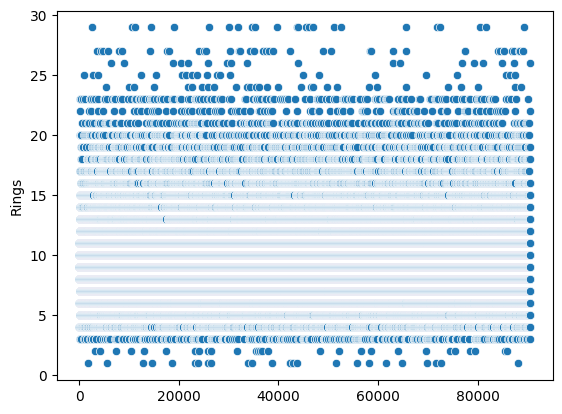

In [5]:
#draw a plot to describe the target variable
sns.scatterplot(df_train['Rings'])

This data needs to reduce the dimension of the data. Need to label encode the gender attributes.

In [6]:
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

#label encoding
le = preprocessing.LabelEncoder()
df_train['Sex'] = le.fit_transform(df_train.Sex)
df_test['Sex'] = le.fit_transform(df_test.Sex)
df_train.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,0,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,1,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,2,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,1,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


Data visualization

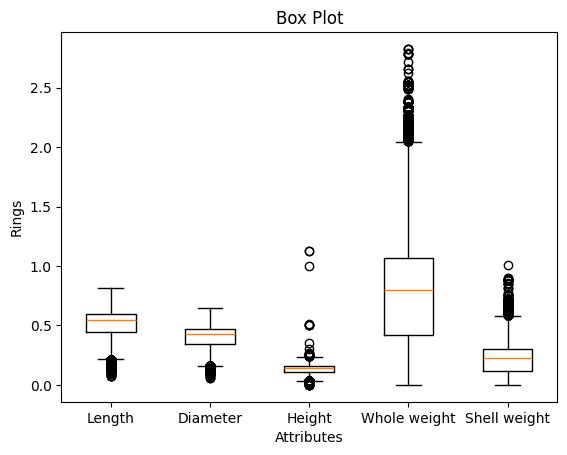

In [7]:
plt.boxplot([df_train['Length'], df_train['Diameter'], df_train['Height'], df_train['Whole weight'], df_train['Shell weight']])
plt.xticks([1, 2, 3, 4, 5], ['Length', 'Diameter', 'Height', 'Whole weight', 'Shell weight'])
plt.xlabel('Attributes')
plt.ylabel('Rings')
plt.title('Box Plot')
plt.show()


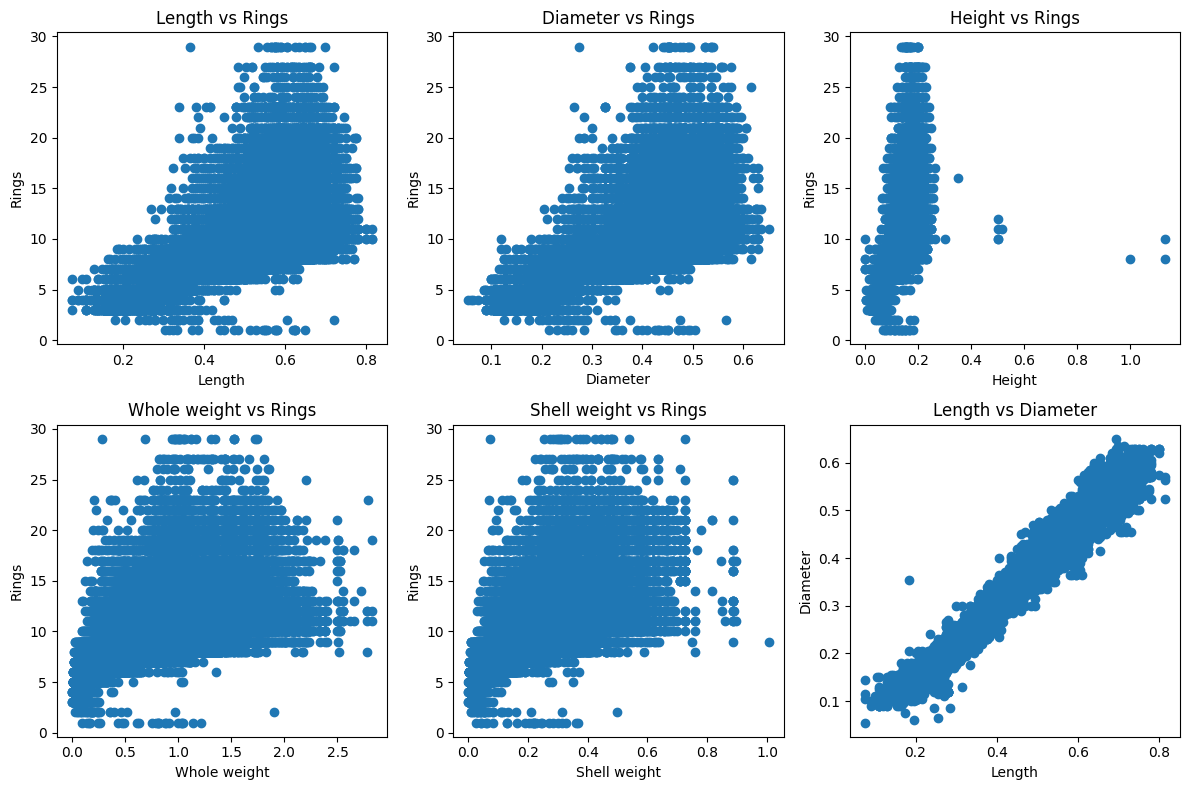

In [8]:
import matplotlib.pyplot as plt

# Create a figure and axes for subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
x1 = df_train['Length']
x2 = df_train['Diameter']
x3 = df_train['Height']
x4 = df_train['Whole weight']
x5 = df_train['Shell weight']
y = df_train['Rings']

# Scatter plot 1
axes[0, 0].scatter(x1, y)
axes[0, 0].set_xlabel('Length')
axes[0, 0].set_ylabel('Rings')
axes[0, 0].set_title('Length vs Rings')

# Scatter plot 2
axes[0, 1].scatter(x2, y)
axes[0, 1].set_xlabel('Diameter')
axes[0, 1].set_ylabel('Rings')
axes[0, 1].set_title('Diameter vs Rings')

# Scatter plot 3
axes[0, 2].scatter(x3, y)
axes[0, 2].set_xlabel('Height')
axes[0, 2].set_ylabel('Rings')
axes[0, 2].set_title('Height vs Rings')

# Scatter plot 4
axes[1, 0].scatter(x4, y)
axes[1, 0].set_xlabel('Whole weight')
axes[1, 0].set_ylabel('Rings')
axes[1, 0].set_title('Whole weight vs Rings')

# Scatter plot 5
axes[1, 1].scatter(x5, y)
axes[1, 1].set_xlabel('Shell weight')
axes[1, 1].set_ylabel('Rings')
axes[1, 1].set_title('Shell weight vs Rings')

# Scatter plot 6
axes[1, 2].scatter(df_train['Length'], df_train['Diameter'])
axes[1, 2].set_xlabel('Length')
axes[1, 2].set_ylabel('Diameter')
axes[1, 2].set_title('Length vs Diameter')

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()


In [9]:
#correlation matrix
corr = df_train.corr()
corr.Rings.sort_values(ascending=False)

Rings             1.000000
Shell weight      0.694766
Height            0.665772
Diameter          0.636832
Length            0.623786
Whole weight      0.617274
Whole weight.2    0.588954
Whole weight.1    0.515067
id                0.000938
Sex              -0.026308
Name: Rings, dtype: float64

<Axes: >

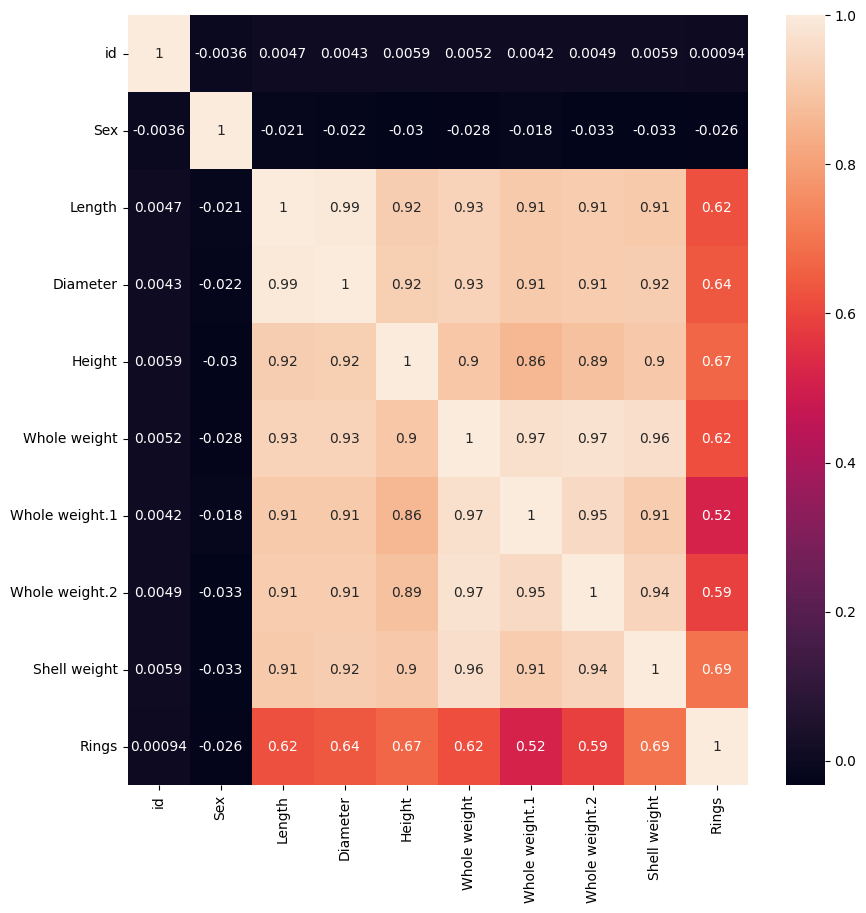

In [10]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True)

In [11]:
#splitting the data
x = df_train.drop(['Rings','id'], axis=1)
y = df_train.Rings
print(x)

       Sex  Length  Diameter  Height  Whole weight  Whole weight.1  \
0        0   0.550     0.430   0.150        0.7715          0.3285   
1        0   0.630     0.490   0.145        1.1300          0.4580   
2        1   0.160     0.110   0.025        0.0210          0.0055   
3        2   0.595     0.475   0.150        0.9145          0.3755   
4        1   0.555     0.425   0.130        0.7820          0.3695   
...    ...     ...       ...     ...           ...             ...   
90610    2   0.335     0.235   0.075        0.1585          0.0685   
90611    2   0.555     0.425   0.150        0.8790          0.3865   
90612    1   0.435     0.330   0.095        0.3215          0.1510   
90613    1   0.345     0.270   0.075        0.2000          0.0980   
90614    1   0.425     0.325   0.100        0.3455          0.1525   

       Whole weight.2  Shell weight  
0              0.1465        0.2400  
1              0.2765        0.3200  
2              0.0030        0.0050  
3      

In [12]:
print(y)

0        11
1        11
2         6
3        10
4         9
         ..
90610     6
90611     9
90612     6
90613     6
90614     8
Name: Rings, Length: 90615, dtype: int64


In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((72492, 8), (18123, 8), (72492,), (18123,))

Build the class for two method: Linear Regression and Principal Component Analysis.

In [14]:
#reduce the dimension of the data using PCA
class PCA():
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        #calculate the mean of the data
        X = X - self.mean
        #calculate the covariance matrix
        cov = np.cov(X.T)
        #find the eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        self.components = eigenvectors[0:self.n_components]

    def transform(self, X):
        X = X - self.mean
        return np.dot(X, self.components.T)

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

In [15]:
#Build the Linear Regression Model - Multiple Linear Regression
class LinearRegression():
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def fit(self, x, y):
        #no of training examples, no of features
        self.m, self.n = x.shape
        #weight initialization
        self.W = np.zeros(self.n)
        self.b = 0
        self.x = x
        self.y = y
        #gradient descent learning
        for i in range(self.iterations):
            self.update_weights()
        return self
    
    def update_weights(self):
        Y_pred = self.predict(self.x)
        #calculate gradients
        dW = -(2 * (self.x.T).dot(self.y - Y_pred)) / self.m
        db = -2 * np.sum(self.y - Y_pred) / self.m
        #update weights
        self.W = self.W - self.learning_rate * dW
        self.b = self.b - self.learning_rate * db
        return self
    
    def predict(self, x):
        return x.dot(self.W) + self.b

## Execute two class method to run the code.

In [16]:
#Execute the PCA class
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)
x_train_pca.shape, x_test_pca.shape

((72492, 2), (18123, 2))

In [17]:
#Execute the Linear Regression class
model = LinearRegression(learning_rate=0.01, iterations=1000)
model.fit(x_train_pca, y_train)

In [18]:
y_pred = model.predict(x_test_pca)
print(y_pred)

[ 8.64215276  7.93710808  9.56501496 ...  8.5001172  11.87672377
 10.73842403]


In [19]:
score = sklearn.metrics.r2_score(y_test, y_pred)
score

0.3734315063841195

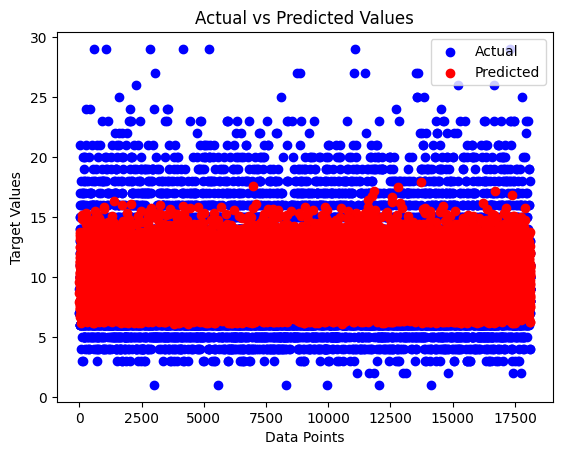

In [20]:
import matplotlib.pyplot as plt

# Assuming you have trained your model and obtained predictions
predictions = model.predict(x_test_pca)

# Plotting the actual values vs predicted values
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(predictions)), predictions, color='red', label='Predicted')
plt.xlabel('Data Points')
plt.ylabel('Target Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

In [21]:
from sklearn.metrics import root_mean_squared_log_error
rmsle = root_mean_squared_log_error(y_test, y_pred)
rmsle

0.20776062849959334

In [22]:
#use the test.csv to predict and submit on Kaggle
df_test.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,90615,2,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,90616,2,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,90617,2,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,90618,2,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,90619,1,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050


In [27]:
x_test_pca_test = pca.transform(df_test.drop('id', axis=1))
y_pred_test = model.predict(x_test_pca_test)
print(y_pred_test.shape)

(60411,)


In [28]:
submissions = pd.DataFrame({'id': df_test['id'], 'Rings': y_pred_test})
submissions.to_csv('Hoang-submission.csv', index=False)